In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

from qctrlvisualizer import get_qctrl_style, plot_controls
from qctrl import Qctrl

qctrl = Qctrl()


qctrl = Qctrl(email='tomutvoicuandrei@gmail.com', password='QcH@ck2021!')

In [2]:
# first let's try to creat one good NOT gate 

In [3]:
from scipy import signal

In [100]:
# Cloud qubit 

control_count = 5   # how manny controls we create 
segment_count = 17  # how many segments each pulse is split into 
duration = 40.0     # duration in ns of eatch pulse
shot_count = 200     # how many projective measurements we take at the end of eatch control 



In [101]:
def gaussian_pulse(t, mean, width):
        return np.exp(-0.5 * ((t - mean) / width) ** 2.0) * np.sqrt(
            0.5 * np.pi / width ** 2.0)

In [102]:
def get_pulse(mean,width,segment_count):
    pulse=[]
    for i in range(0,segment_count):
        p=gaussian_pulse(t=i*segmentsize+segmentsize/2, mean=duration/2, width=width)
        pulse.append(p)
    return pulse 

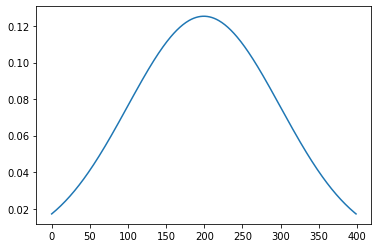

In [103]:
#initial parameters
segment_count=400
width=duration/4
mean=duration/2
segmentsize=duration/segment_count
amplitude=0.5

pulse=get_pulse(mean,width,segment_count)
plt.plot(pulse)

In [104]:
control = []
real_part = pulse#np.random.random(size=[segment_count])
imag_part = np.random.random(size=[segment_count])
values = amplitude * (real_part + 1j * imag_part*0)
control.append({"duration": duration, "values": values})

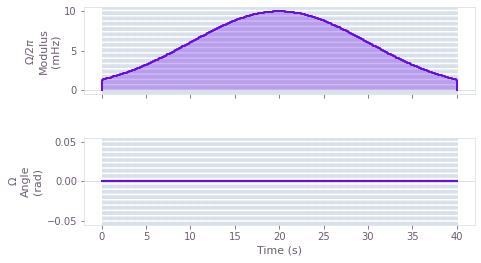

In [105]:
# Plot the last control as an example.
plot_controls(
    figure=plt.figure(),
    controls={
        "$\Omega$": [
            {"duration": duration / segment_count, "value": value} for value in values
        ]
    },
)

In [106]:
def cost_h(params):
    
    print('params:',params)
    amplitude=params[0]
    width=params[1]
        
    #
    mean=duration/2
    
    #
    
    segmentsize=duration/segment_count
    
    pulse_real=get_pulse(mean,width,segment_count)
    
    real_part = pulse_real
    imag_part = np.random.random(size=[segment_count])# if first experiments it will be set to 0
    
    values = amplitude * (real_part + 1j * imag_part*0)
    
    repetitions=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    controls=[]
    for repetition_count in repetitions:
        controls.append({"duration": duration, "values": values, "repetition_count": repetition_count})
        experiment_results = qctrl.functions.calculate_qchack_measurements(controls=controls,shot_count=shot_count,)


    cost=0
    for repetition_count, measurement_counts in zip(repetitions, experiment_results.measurements):
        p0 = measurement_counts.count(0) / shot_count
        p1 = measurement_counts.count(1) / shot_count
        p2 = measurement_counts.count(2) / shot_count
        y_genrate=[p0,p1,p2]
        if  repetition_count%2==1:
            y_desire=[0.5,0.5,0]
            c=np.array(y_desire) @ np.array(y_genrate)
            cost=cost-c
        else:
            y_desire=[1,0,0]
            c=np.array(y_desire) @ np.array(y_genrate)
            cost=cost-c

        print(f"With {repetition_count:2d} repetitions: P(|0>) = {p0:.2f}, P(|1>) = {p1:.2f}, P(|2>) = {p2:.2f} ,c={c:.3f} .")
    
    print('Cost:',cost)
    return cost 

In [107]:
segment_count=250 
width=25
mean=duration/2
segmentsize=duration/segment_count
amplitude=6
duration = 40

init_params=[ 4.03658917 ,28.45216669]#[ 3.95455002, 26.37698498]#[ 3.95450088, 26.25199421]#[ 3.95455478, 25.25190998]#[3.96693201, 24.50168063]

In [108]:
cost_h(init_params)

params: [4.03658917, 28.45216669]


100%|██████████| 100/100 [00:10<00:00, 10.00it/s]

With  1 repetitions: P(|0>) = 0.49, P(|1>) = 0.51, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.995 .
With  3 repetitions: P(|0>) = 0.54, P(|1>) = 0.46, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.54, P(|1>) = 0.46, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With  7 repetitions: P(|0>) = 0.53, P(|1>) = 0.47, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  9 repetitions: P(|0>) = 0.60, P(|1>) = 0.40, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With 11 repetitions: P(|0>) = 0.59, P(|1>) = 0.41, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With 13 repetitions: P(|0>) = 0.55, P(|1>) = 0.46, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

-14.84

In [109]:
params=init_params#[ 6.5388117 , 13.36186856]
cobyla_options = {'maxiter': 1000, 'disp': True, 'catol': 0.002}
res = scipy.optimize.minimize(cost_h, params, method='COBYLA',options=cobyla_options)

params: [ 4.03658917 28.45216669]


100%|██████████| 100/100 [00:03<00:00, 31.40it/s]


With  1 repetitions: P(|0>) = 0.59, P(|1>) = 0.41, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.60, P(|1>) = 0.40, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.59, P(|1>) = 0.41, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.995 .
With  7 repetitions: P(|0>) = 0.54, P(|1>) = 0.47, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  9 repetitions: P(|0>) = 0.52, P(|1>) = 0.48, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With 11 repetitions: P(|0>) = 0.47, P(|1>) = 0.53, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With 13 repetitions: P(|0>) = 0.68, P(|1>) = 0.33, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:03<00:00, 32.40it/s]


With  1 repetitions: P(|0>) = 0.46, P(|1>) = 0.54, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.92, P(|1>) = 0.08, P(|2>) = 0.00 ,c=0.920 .
With  3 repetitions: P(|0>) = 0.59, P(|1>) = 0.41, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.75, P(|1>) = 0.25, P(|2>) = 0.00 ,c=0.750 .
With  5 repetitions: P(|0>) = 0.76, P(|1>) = 0.24, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.57, P(|1>) = 0.43, P(|2>) = 0.00 ,c=0.570 .
With  7 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.45, P(|1>) = 0.55, P(|2>) = 0.00 ,c=0.450 .
With  9 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.51, P(|1>) = 0.49, P(|2>) = 0.00 ,c=0.505 .
With 11 repetitions: P(|0>) = 0.88, P(|1>) = 0.12, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.68, P(|1>) = 0.33, P(|2>) = 0.00 ,c=0.675 .
With 13 repetitions: P(|0>) = 0.68, P(|1>) = 0.32, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


With  1 repetitions: P(|0>) = 0.57, P(|1>) = 0.43, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With  3 repetitions: P(|0>) = 0.56, P(|1>) = 0.45, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.58, P(|1>) = 0.42, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With  7 repetitions: P(|0>) = 0.54, P(|1>) = 0.47, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  9 repetitions: P(|0>) = 0.62, P(|1>) = 0.38, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With 11 repetitions: P(|0>) = 0.65, P(|1>) = 0.35, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.975 .
With 13 repetitions: P(|0>) = 0.64, P(|1>) = 0.36, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:03<00:00, 32.13it/s]


With  1 repetitions: P(|0>) = 0.73, P(|1>) = 0.27, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.945 .
With  3 repetitions: P(|0>) = 0.74, P(|1>) = 0.26, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.91, P(|1>) = 0.10, P(|2>) = 0.00 ,c=0.905 .
With  5 repetitions: P(|0>) = 0.85, P(|1>) = 0.15, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.81, P(|1>) = 0.18, P(|2>) = 0.00 ,c=0.815 .
With  7 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.76, P(|1>) = 0.24, P(|2>) = 0.00 ,c=0.755 .
With  9 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.74, P(|1>) = 0.26, P(|2>) = 0.00 ,c=0.740 .
With 11 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.66, P(|1>) = 0.34, P(|2>) = 0.00 ,c=0.660 .
With 13 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:03<00:00, 30.90it/s]


With  1 repetitions: P(|0>) = 0.60, P(|1>) = 0.40, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.975 .
With  3 repetitions: P(|0>) = 0.65, P(|1>) = 0.35, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.94, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.935 .
With  5 repetitions: P(|0>) = 0.63, P(|1>) = 0.37, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.95, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.955 .
With  7 repetitions: P(|0>) = 0.69, P(|1>) = 0.31, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.88, P(|1>) = 0.12, P(|2>) = 0.00 ,c=0.875 .
With  9 repetitions: P(|0>) = 0.74, P(|1>) = 0.26, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.81, P(|1>) = 0.19, P(|2>) = 0.00 ,c=0.810 .
With 11 repetitions: P(|0>) = 0.80, P(|1>) = 0.20, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.72, P(|1>) = 0.28, P(|2>) = 0.00 ,c=0.720 .
With 13 repetitions: P(|0>) = 0.89, P(|1>) = 0.11, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:03<00:00, 31.39it/s]


With  1 repetitions: P(|0>) = 0.52, P(|1>) = 0.48, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With  3 repetitions: P(|0>) = 0.59, P(|1>) = 0.41, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
With  5 repetitions: P(|0>) = 0.57, P(|1>) = 0.43, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
With  7 repetitions: P(|0>) = 0.51, P(|1>) = 0.49, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.89, P(|1>) = 0.11, P(|2>) = 0.00 ,c=0.890 .
With  9 repetitions: P(|0>) = 0.62, P(|1>) = 0.38, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.89, P(|1>) = 0.11, P(|2>) = 0.00 ,c=0.890 .
With 11 repetitions: P(|0>) = 0.66, P(|1>) = 0.34, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.88, P(|1>) = 0.12, P(|2>) = 0.00 ,c=0.875 .
With 13 repetitions: P(|0>) = 0.70, P(|1>) = 0.29, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:09<00:00, 10.20it/s]


With  1 repetitions: P(|0>) = 0.52, P(|1>) = 0.48, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.56, P(|1>) = 0.44, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.995 .
With  5 repetitions: P(|0>) = 0.60, P(|1>) = 0.40, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.57, P(|1>) = 0.42, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With  9 repetitions: P(|0>) = 0.54, P(|1>) = 0.47, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With 11 repetitions: P(|0>) = 0.52, P(|1>) = 0.48, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With 13 repetitions: P(|0>) = 0.56, P(|1>) = 0.43, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:03<00:00, 31.63it/s]


With  1 repetitions: P(|0>) = 0.57, P(|1>) = 0.42, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.995 .
With  3 repetitions: P(|0>) = 0.61, P(|1>) = 0.39, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.57, P(|1>) = 0.42, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  7 repetitions: P(|0>) = 0.68, P(|1>) = 0.32, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.965 .
With  9 repetitions: P(|0>) = 0.64, P(|1>) = 0.36, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.925 .
With 11 repetitions: P(|0>) = 0.68, P(|1>) = 0.33, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.92, P(|1>) = 0.08, P(|2>) = 0.00 ,c=0.920 .
With 13 repetitions: P(|0>) = 0.69, P(|1>) = 0.32, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


With  1 repetitions: P(|0>) = 0.64, P(|1>) = 0.36, P(|2>) = 0.00 ,c=0.500 .
With  2 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.975 .
With  3 repetitions: P(|0>) = 0.56, P(|1>) = 0.45, P(|2>) = 0.00 ,c=0.500 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.56, P(|1>) = 0.45, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.57, P(|1>) = 0.42, P(|2>) = 0.00 ,c=0.500 .
With  8 repetitions: P(|0>) = 0.98, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.985 .
With  9 repetitions: P(|0>) = 0.58, P(|1>) = 0.41, P(|2>) = 0.00 ,c=0.500 .
With 10 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With 11 repetitions: P(|0>) = 0.54, P(|1>) = 0.46, P(|2>) = 0.00 ,c=0.500 .
With 12 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With 13 repetitions: P(|0>) = 0.61, P(|1>) = 0.39, P(|2>) = 0.00 ,c=0.500 .
With 14 repe

  0%|          | 0/100 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# decent 20 [ 4.03658917 28.45216669]

In [ ]:
# decent 18 [ 4.03658917 28.45216669]

In [ ]:
# complet 10-15 [ 3.93857414 27.49989817]

In [ ]:
#10 15 [ 3.95407265 28.37688234]  # grat 15 [ 3.96188359 28.37672627]

In [ ]:
#[ 2.95888881 27.47003743]-> greatresults test untill 9[ 3.95407265 27.37688234]

In [ ]:
#[ 4.95450088 26.25199421] good candidate graeat answer until 7 [ 3.95455002 26.37698498]  #[ 3.95455002 26.37698498]

In [24]:
res

     fun: -3.4375
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 29
  status: 1
 success: True
       x: array([ 3.95450088, 26.25199421])

In [ ]:
y_desire=[0.5,0.5,0]
            c=np.array(y_desire) @ np.array(y_genrate)

In [41]:
'''
def get_pulse(mean,width,segment_count):
    pulse=[]
    for i in range(0,segment_count):
        p=gaussian_pulse(t=i*segmentsize+segmentsize/2, mean=duration/2, width=width)
        pulse.append(p)
    return pulse 
'''

'\ndef get_pulse(mean,width,segment_count):\n    pulse=[]\n    for i in range(0,segment_count):\n        p=gaussian_pulse(t=i*segmentsize+segmentsize/2, mean=duration/2, width=width)\n        pulse.append(p)\n    return pulse \n'

In [110]:
params= [ 4.03658917 ,28.45216669]#[ 4.03658917 ,28.45216669]#[ 3.93857414, 27.49989817]  #[ 3.96188359, 28.37672627]
#cost_h(p)

In [111]:
amplitude=params[0]
width=params[1]

#
mean=duration/2

#

segmentsize=duration/segment_count

pulse_real=get_pulse(mean,width,segment_count)

real_part = pulse_real
imag_part = np.random.random(size=[segment_count])# if first experiments it will be set to 0

values = amplitude * (real_part + 1j * imag_part*0)
print(values)

[0.13916172+0.j 0.13970848+0.j 0.14025296+0.j 0.14079511+0.j
 0.14133489+0.j 0.14187225+0.j 0.14240715+0.j 0.14293954+0.j
 0.14346939+0.j 0.14399665+0.j 0.14452127+0.j 0.14504322+0.j
 0.14556245+0.j 0.14607892+0.j 0.14659259+0.j 0.14710341+0.j
 0.14761135+0.j 0.14811635+0.j 0.14861838+0.j 0.1491174 +0.j
 0.14961336+0.j 0.15010623+0.j 0.15059595+0.j 0.1510825 +0.j
 0.15156582+0.j 0.15204588+0.j 0.15252264+0.j 0.15299606+0.j
 0.15346609+0.j 0.1539327 +0.j 0.15439584+0.j 0.15485548+0.j
 0.15531158+0.j 0.1557641 +0.j 0.15621299+0.j 0.15665822+0.j
 0.15709976+0.j 0.15753755+0.j 0.15797157+0.j 0.15840178+0.j
 0.15882814+0.j 0.1592506 +0.j 0.15966914+0.j 0.16008372+0.j
 0.1604943 +0.j 0.16090085+0.j 0.16130332+0.j 0.16170169+0.j
 0.16209591+0.j 0.16248596+0.j 0.16287179+0.j 0.16325338+0.j
 0.16363069+0.j 0.16400368+0.j 0.16437233+0.j 0.16473659+0.j
 0.16509644+0.j 0.16545185+0.j 0.16580278+0.j 0.16614919+0.j
 0.16649107+0.j 0.16682837+0.j 0.16716107+0.j 0.16748914+0.j
 0.16781254+0.j 0.168131

In [113]:
import jsonpickle.ext.numpy as jsonpickle_numpy
import jsonpickle
import numpy as np

jsonpickle_numpy.register_handlers()

not_control = {"duration": duration, "value": values}
json_not_control = jsonpickle.encode(not_control)
with open("h_control.json", "w") as file:
    file.write(json_not_control)

